# Run the Experiment on the Six Character Genes

Make tables for the results and save them

In [1]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import permutations, combinations
from math import factorial, log
from time import time

from xmlparse import loadRef, loadGeometryBases, getXmlScore, minXml, loadScores
from score_strokes import alignStrokes, greedyAlign2
from exhaustive import computeExhaustive, exhaustScore, exhaustScoreAlignment
from compare_genes import getScores, exhaustiveScores



2024-04-12T18:06:07.878992Z [INFO ] Stylus initialized - Stylus 1.5.0 [RELEASE - Aug 29 2023 15:40:46] (c) 2006-2009 Biologic Institute


In [2]:
chars = ["4EFB", "5408", "5728", "5B57", "56E0", "5411"]

root_dir = "Genes/6-stroke genes"
#[next(os.walk(child))[1] for child in list(next(os.walk(root_dir))[1])]
gene_dirs_stacked = [next(os.walk(f"{root_dir}/{child}")) for child in list(next(os.walk(root_dir))[1])]
gene_dirs = []
for root, children, _ in gene_dirs_stacked:
    gene_dirs += [f"{root}/{child}" for child in children]

save_dir = "SixCharsExperiment/tables"

In [3]:
"""
#Regenerate these
exhaustive_tables = {}
heuristic_tables = {}
gene_id_table = []

for gene_dir in gene_dirs:
    exhaustive_table = []
    heuristic_table = []
    marks_table = []
    
    file_components = gene_dir.split("/")
    min_score, han_char = file_components[2].split()[2], file_components[3].split(".")[1].split()[2]
    frame_title = f"Minimum Score: {min_score}, Han Char: {han_char}"
    
    for char in chars:
        exhaustive_scores = exhaustiveScores(char, gene_dir, save=True, file_prefix=f"{min_score}_")
        heuristic_scores, _, marks = getScores(alignStrokes, char, gene_dir)
        
        exhaustive_table.append(exhaustive_scores)
        heuristic_table.append(heuristic_scores)
        marks_table.append(marks)

    file_names = []
    for _, _, files in os.walk(gene_dir):
        for file in sorted(files):
            if file.endswith("gene"):
                file_names.append(file)
    file_names = np.array(file_names)

    gene_ids = [f"{min_score}_{han_char}_{f}" for f in file_names]
    
    exhaustive_frame = pd.DataFrame({char: scores for (char, scores) in zip(chars, exhaustive_table)})
    heuristic_frame = pd.DataFrame({char: scores for (char, scores) in zip(chars, heuristic_table)})

    exhaustive_frame.insert(0, "GeneID", gene_ids)
    heuristic_frame.insert(0, "GeneID", gene_ids)

    exhaustive_frame.style.set_caption(f"{frame_title}, Exhaustive")
    exhaustive_frame.style.set_caption(f"{frame_title}, Heuristic")

    exhaustive_frame.to_csv(f"{save_dir}/{min_score}_{han_char}_exhaustive.csv", index=False)
    heuristic_frame.to_csv(f"{save_dir}/{min_score}_{han_char}_heuristic.csv", index=False)
    
    exhaustive_tables[gene_dir] = exhaustive_frame
    heuristic_tables[gene_dir] = heuristic_frame
    
    gene_id_table += [(gene_id, f"{gene_dir}/{f}", scores[han_char], mark) for gene_id, f, scores, mark in zip(gene_ids, file_names, exhaustive_frame.loc, marks_table[chars.index(han_char)])]

gene_id_frame = pd.DataFrame(gene_id_table, columns=["GeneID", "Filepath", "Score", "Mark"])
gene_id_frame.to_csv(f"{save_dir}/gene_table.csv", index=False)

exhaustive_tables[gene_dirs[0]]
#exhaust_0.05_5411_56E0.02.67.gene.npy
"""

'\n#Regenerate these\nexhaustive_tables = {}\nheuristic_tables = {}\ngene_id_table = []\n\nfor gene_dir in gene_dirs:\n    exhaustive_table = []\n    heuristic_table = []\n    marks_table = []\n    \n    file_components = gene_dir.split("/")\n    min_score, han_char = file_components[2].split()[2], file_components[3].split(".")[1].split()[2]\n    frame_title = f"Minimum Score: {min_score}, Han Char: {han_char}"\n    \n    for char in chars:\n        exhaustive_scores = exhaustiveScores(char, gene_dir, save=True, file_prefix=f"{min_score}_")\n        heuristic_scores, _, marks = getScores(alignStrokes, char, gene_dir)\n        \n        exhaustive_table.append(exhaustive_scores)\n        heuristic_table.append(heuristic_scores)\n        marks_table.append(marks)\n\n    file_names = []\n    for _, _, files in os.walk(gene_dir):\n        for file in sorted(files):\n            if file.endswith("gene"):\n                file_names.append(file)\n    file_names = np.array(file_names)\n\n    

In [4]:
exhaustive_tables = {}
heuristic_tables = {}
gene_id_table = []
for gene_dir in gene_dirs:
    file_components = gene_dir.split("/")
    min_score, han_char = file_components[2].split()[2], file_components[3].split(".")[1].split()[2]
    
    exhaustive_frame = pd.read_csv(f"{save_dir}/{min_score}_{han_char}_exhaustive.csv")
    heuristic_frame = pd.read_csv(f"{save_dir}/{min_score}_{han_char}_heuristic.csv")
    
    exhaustive_tables[gene_dir] = exhaustive_frame
    heuristic_tables[gene_dir] = heuristic_frame

gene_id_table = pd.read_csv(f"{save_dir}/gene_table.csv")

print(gene_dirs[10])
exhaustive_tables[gene_dirs[10]]

Genes/6-stroke genes/min score 0.025/maint_0.025 on 5411.08


,GeneID,4EFB,5408,5728,5B57,56E0,5411
0,0.025_5411_5411.08.1.gene,0.000099,0.000004,0.000033,0.000287,0.000141,0.028633
1,0.025_5411_5411.08.10.gene,0.000074,0.000016,0.000010,0.000994,0.000098,0.026052
2,0.025_5411_5411.08.100.gene,0.000384,0.000057,0.000097,0.000432,0.000034,0.026124
3,0.025_5411_5411.08.101.gene,0.000101,0.000053,0.000061,0.000531,0.000067,0.037119
4,0.025_5411_5411.08.102.gene,0.000458,0.000034,0.000097,0.001266,0.001110,0.034458
...,...,...,...,...,...,...,...
195,0.025_5411_5411.08.95.gene,0.000421,0.000048,0.000042,0.001943,0.000351,0.028014
196,0.025_5411_5411.08.96.gene,0.000349,0.000137,0.000071,0.000575,0.001103,0.028926
197,0.025_5411_5411.08.97.gene,0.000289,0.000004,0.000551,0.000405,0.000023,0.026780
198,0.025_5411_5411.08.98.gene,0.000179,0.000013,0.000069,0.000620,0.000172,0.028896


In [5]:
gene_id_table

,GeneID,Filepath,Score,Mark
0,0.1_4EFB_4EFB.2.1.gene,Genes/6-stroke genes/min score 0.1/maint_0.1 o...,0.100902,False
1,0.1_4EFB_4EFB.2.10.gene,Genes/6-stroke genes/min score 0.1/maint_0.1 o...,0.102741,False
2,0.1_4EFB_4EFB.2.100.gene,Genes/6-stroke genes/min score 0.1/maint_0.1 o...,0.107984,False
3,0.1_4EFB_4EFB.2.101.gene,Genes/6-stroke genes/min score 0.1/maint_0.1 o...,0.115758,False
4,0.1_4EFB_4EFB.2.102.gene,Genes/6-stroke genes/min score 0.1/maint_0.1 o...,0.104119,False
...,...,...,...,...
7195,0.05_5B57_5B57.01.95.gene,Genes/6-stroke genes/min score 0.05/maint_0.05...,0.050238,False
7196,0.05_5B57_5B57.01.96.gene,Genes/6-stroke genes/min score 0.05/maint_0.05...,0.050070,False
7197,0.05_5B57_5B57.01.97.gene,Genes/6-stroke genes/min score 0.05/maint_0.05...,0.060083,False
7198,0.05_5B57_5B57.01.98.gene,Genes/6-stroke genes/min score 0.05/maint_0.05...,0.054437,False


In [6]:
#Construct Master table with gene ID + Arch scores, regardless of original directory
#Gene scores with Gene, Arch, Filename, Original Score
#Filter out marks - these may account for the problem cases on the graph


(200, 7)
(1176,) (200,)
Genes/6-stroke genes/min score 0.025/maint_0.025 on 5411.08


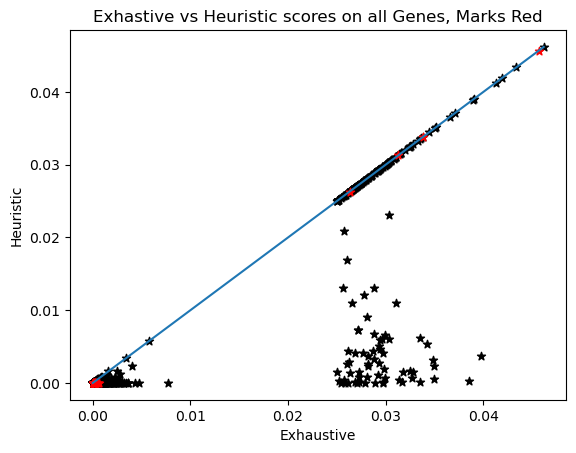

In [7]:
graphs_dir = "Graphs"

gene_dir_selection = gene_dirs[10]

score_file_ids = exhaustive_tables[gene_dir_selection].to_numpy()[:,0]
gene_table_selection = gene_id_table.loc[gene_id_table["GeneID"].isin(score_file_ids)]
filter_marks = gene_table_selection["Mark"] == False
filter_marks_true = gene_table_selection["Mark"] == True

print(exhaustive_tables[gene_dir_selection].to_numpy().shape)

exhaustive_scores, heuristic_scores = exhaustive_tables[gene_dir_selection].to_numpy()[filter_marks,1:].flatten(), heuristic_tables[gene_dir_selection].to_numpy()[filter_marks,1:].flatten()
exhaustive_scores_m, heuristic_scores_m = exhaustive_tables[gene_dir_selection].to_numpy()[filter_marks_true,1:].flatten(), heuristic_tables[gene_dir_selection].to_numpy()[filter_marks_true,1:].flatten()

box_bound = exhaustive_scores[1:].max()
print(exhaustive_scores.shape, filter_marks.shape)

#plt.plot(exhaustive_scores, heuristic_scores, "k*")
plt.scatter(exhaustive_scores, heuristic_scores, c="black", marker="*")
plt.scatter(exhaustive_scores_m, heuristic_scores_m, c="red", marker="*")
plt.plot([0, box_bound], [0, box_bound])
plt.xlabel(f"Exhaustive")
plt.ylabel(f"Heuristic")
plt.title(f"Exhastive vs Heuristic scores on all Genes, Marks Red")
plt.savefig(f"{graphs_dir}/six_char_gene_dir.png")

print(gene_dirs[10])

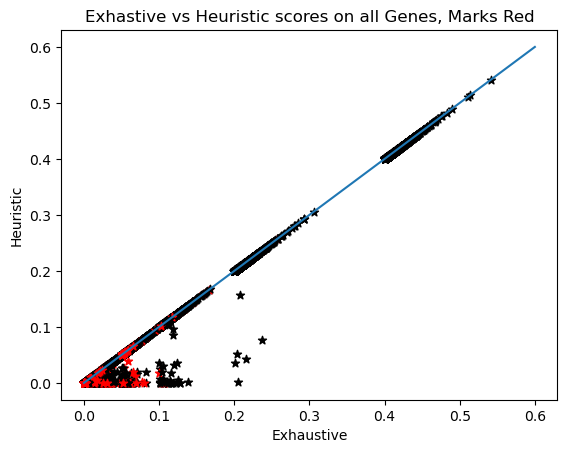

In [8]:
graphs_dir = "Graphs"

hit_scores = []
miss_scores = []

all_exhaustives = []
all_heuristics = []

plt.plot([0, 0.6], [0, 0.6])

for gene_dir in gene_dirs:
    score_file_ids = exhaustive_tables[gene_dir].to_numpy()[:,0]
    gene_table_selection = gene_id_table.loc[gene_id_table["GeneID"].isin(score_file_ids)]
    filter_marks = gene_table_selection["Mark"] == False
    filter_marks_true = gene_table_selection["Mark"] == True
    
    exhaustive_scores, heuristic_scores = exhaustive_tables[gene_dir].to_numpy()[filter_marks,1:].flatten(), heuristic_tables[gene_dir].to_numpy()[filter_marks,1:].flatten()
    exhaustive_scores_m, heuristic_scores_m = exhaustive_tables[gene_dir].to_numpy()[filter_marks_true,1:].flatten(), heuristic_tables[gene_dir].to_numpy()[filter_marks_true,1:].flatten()
    
    if exhaustive_scores.shape[0] == 0:
        continue

    mismatches = exhaustive_tables[gene_dir] != heuristic_tables[gene_dir]
    matches = exhaustive_tables[gene_dir] == heuristic_tables[gene_dir]
    mismatches["GeneID"] = exhaustive_tables[gene_dir]["GeneID"]
    #print(mismatches[mismatches["4EFB"] & mismatches["5408"] & mismatches["5728"] & mismatches["5B57"] & mismatches["56E0"] & mismatches["5411"]])

    hits = matches[matches["4EFB"] | matches["5408"] | matches["5728"] | matches["5B57"] | matches["56E0"] | matches["5411"]]
    misses = mismatches[mismatches["4EFB"] & mismatches["5408"] & mismatches["5728"] & mismatches["5B57"] & mismatches["56E0"] & mismatches["5411"]]

    all_exhaustives += list(exhaustive_scores)
    all_heuristics += list(heuristic_scores)

    hit_scores += list(exhaustive_tables[gene_dir].iloc[hits.index, 1:].max(axis=1))
    #list(exhaustive_tables[gene_dir].iloc[hits.index]["GeneID"])
    miss_scores += list(exhaustive_tables[gene_dir].iloc[misses.index, 1:].max(axis=1))
    #list(exhaustive_tables[gene_dir].iloc[misses.index]["GeneID"])
    
    #print(exhaustive_tables[gene_dir].iloc[hits.index, 1:].max(axis=1))
    #Checking
    #print(exhaustive_tables[gene_dir].shape[0] == len(list(exhaustive_tables[gene_dir].iloc[hits.index]["GeneID"]))+len(list(exhaustive_tables[gene_dir].iloc[misses.index]["GeneID"])))
    
    plt.scatter(exhaustive_scores, heuristic_scores, c="black", marker="*")
    plt.scatter(exhaustive_scores_m, heuristic_scores_m, c="red", marker="*")
    plt.xlabel(f"Exhaustive")
    plt.ylabel(f"Heuristic")
    plt.title(f"Exhastive vs Heuristic scores on all Genes, Marks Red")
    plt.savefig(f"{graphs_dir}/six_char_gene_dir.png")

all_exhaustives = np.array(all_exhaustives)
all_heuristics = np.array(all_heuristics)

hit_scores = np.array(hit_scores)
miss_scores = np.array(miss_scores)

filt_02 = all_exhaustives < 0.2
filt_04 = (all_exhaustives >= 0.2)*(all_exhaustives < 0.4)
filt_06 = (all_exhaustives >= 0.4)*(all_exhaustives < 0.6)
match = (all_exhaustives - all_heuristics)/all_exhaustives > 0.01
match_02 = match[filt_02]
match_04 = match[filt_04]
match_06 = match[filt_06]
    
#print(np.sum(match_02)/match_02.shape[0])
#print(np.sum(match_04)/match_04.shape[0])
#print(np.sum(match_06)/match_06.shape[0])

In [9]:
n = 100

bins = [0]
hit_percent = []
miss_percent = []
miss_points = []
x_points = []

for i in range(n-1):
    filt_h = (hit_scores >= (i/n))*(hit_scores<(i+1)/n)
    filt_m = (miss_scores >= (i/n))*(miss_scores<(i+1)/n)
    hit_filt = hit_scores[filt_h]
    miss_filt = miss_scores[filt_m]
    if hit_filt.shape[0] != 0 or miss_filt.shape[0] != 0:
        print(f"{(i/n)} <= s < {((i+1)/n)} = {miss_filt.shape[0]/(hit_filt.shape[0]+miss_filt.shape[0])}")
        miss_points.append((miss_filt.shape[0]/(hit_filt.shape[0]+miss_filt.shape[0]), (i+1)/n))
        x_points.append((i+0.5)/n)
        miss_percent.append(miss_filt.shape[0]/(hit_filt.shape[0]+miss_filt.shape[0]))
        hit_percent.append(1-miss_percent[-1])
        bins.append((i+1)/n)

print(x_points)

0.01 <= s < 0.02 = 0.3244406196213425
0.02 <= s < 0.03 = 0.16800920598388952
0.03 <= s < 0.04 = 0.15432098765432098
0.04 <= s < 0.05 = 0.10526315789473684
0.05 <= s < 0.06 = 0.07467532467532467
0.06 <= s < 0.07 = 0.047619047619047616
0.07 <= s < 0.08 = 0.0
0.08 <= s < 0.09 = 0.17647058823529413
0.09 <= s < 0.1 = 0.0
0.1 <= s < 0.11 = 0.019659239842726082
0.11 <= s < 0.12 = 0.017361111111111112
0.12 <= s < 0.13 = 0.03225806451612903
0.13 <= s < 0.14 = 0.02631578947368421
0.14 <= s < 0.15 = 0.0
0.15 <= s < 0.16 = 0.0
0.16 <= s < 0.17 = 0.0
0.2 <= s < 0.21 = 0.004658385093167702
0.21 <= s < 0.22 = 0.003246753246753247
0.22 <= s < 0.23 = 0.0
0.23 <= s < 0.24 = 0.014705882352941176
0.24 <= s < 0.25 = 0.0
0.25 <= s < 0.26 = 0.0
0.26 <= s < 0.27 = 0.0
0.27 <= s < 0.28 = 0.0
0.28 <= s < 0.29 = 0.0
0.29 <= s < 0.3 = 0.0
0.3 <= s < 0.31 = 0.0
0.4 <= s < 0.41 = 0.0
0.41 <= s < 0.42 = 0.0
0.42 <= s < 0.43 = 0.0
0.43 <= s < 0.44 = 0.0
0.44 <= s < 0.45 = 0.0
0.45 <= s < 0.46 = 0.0
0.46 <= s < 0.47 =

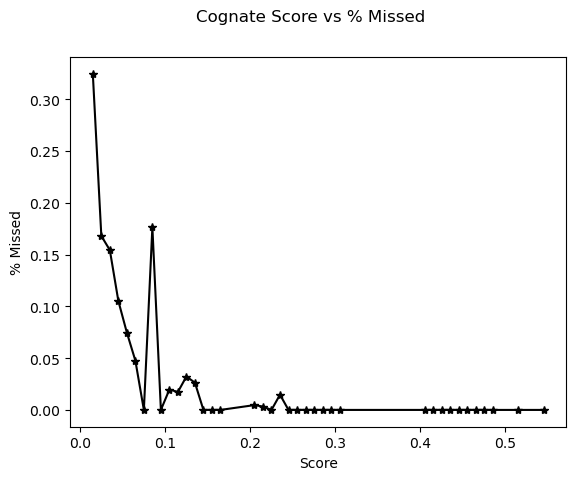

In [10]:
plt.xlabel("Score")
plt.ylabel("% Missed")
plt.suptitle("Cognate Score vs % Missed")
#plt.yscale("log")

plt.plot(x_points, miss_percent, "-k*")
plt.savefig("cognate_scorevmissed_log.png")
#log scale plot
#ax x scale to log

In [11]:
n = 100

bins = [0]
hit_percent = []
miss_percent = []
miss_points = []
x_points = []

"""
filt_02 = all_exhaustives < 0.2
filt_04 = (all_exhaustives >= 0.2)*(all_exhaustives < 0.4)
filt_06 = (all_exhaustives >= 0.4)*(all_exhaustives < 0.6)
match = (all_exhaustives - all_heuristics)/all_exhaustives > 0.01
match_02 = match[filt_02]
match_04 = match[filt_04]
match_06 = match[filt_06]
"""

for i in range(n-1):
    filt = (all_exhaustives >= (i/n))*(all_exhaustives<(i+1)/n)
    match = (all_exhaustives - all_heuristics)/all_exhaustives < 0.01
    if match.shape[0] != 0 and match[filt].shape[0] != 0:
        matches = match[filt]
        print(f"{(i/n)} <= s < {((i+1)/n)} = {np.sum(matches)/matches.shape[0]}")
        x_points.append((i+0.5)/n)
        hit_percent.append(np.sum(matches)/matches.shape[0])
        miss_percent.append(1-hit_percent[-1])
        bins.append((i+1)/n)

print(x_points)

0.0 <= s < 0.01 = 0.056391388291865505
0.01 <= s < 0.02 = 0.4646814404432133
0.02 <= s < 0.03 = 0.7635402906208718
0.03 <= s < 0.04 = 0.8296089385474861
0.04 <= s < 0.05 = 0.9058823529411765
0.05 <= s < 0.06 = 0.9204693611473272
0.06 <= s < 0.07 = 0.9601990049751243
0.07 <= s < 0.08 = 0.9565217391304348
0.08 <= s < 0.09 = 0.9682539682539683
0.09 <= s < 0.1 = 1.0
0.1 <= s < 0.11 = 0.9742857142857143
0.11 <= s < 0.12 = 0.9507042253521126
0.12 <= s < 0.13 = 0.9361702127659575
0.13 <= s < 0.14 = 0.9787234042553191
0.14 <= s < 0.15 = 1.0
0.15 <= s < 0.16 = 1.0
0.16 <= s < 0.17 = 1.0
0.2 <= s < 0.21 = 0.993431855500821
0.21 <= s < 0.22 = 0.996551724137931
0.22 <= s < 0.23 = 1.0
0.23 <= s < 0.24 = 0.9841269841269841
0.24 <= s < 0.25 = 1.0
0.25 <= s < 0.26 = 1.0
0.26 <= s < 0.27 = 1.0
0.27 <= s < 0.28 = 1.0
0.28 <= s < 0.29 = 1.0
0.29 <= s < 0.3 = 1.0
0.3 <= s < 0.31 = 1.0
0.4 <= s < 0.41 = 1.0
0.41 <= s < 0.42 = 1.0
0.42 <= s < 0.43 = 1.0
0.43 <= s < 0.44 = 1.0
0.44 <= s < 0.45 = 1.0
0.45 <= 

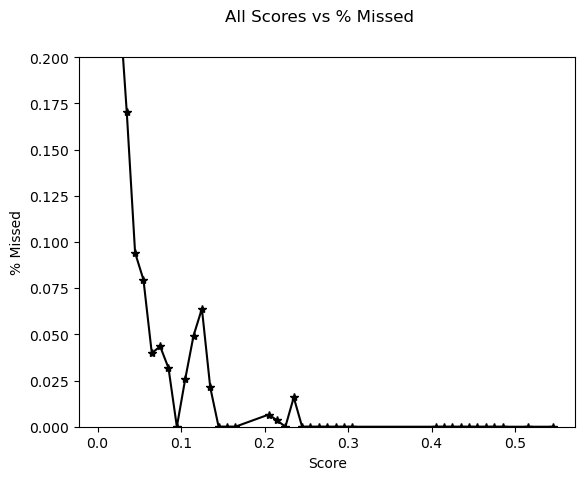

In [12]:
plt.xlabel("Score")
plt.ylabel("% Missed")
plt.suptitle("All Scores vs % Missed")
#plt.yscale("log")
plt.ylim([0.0, 0.2])

plt.plot(x_points, miss_percent, "-k*")

plt.savefig("noncognate_scorevmissed.png")